# $\ell^2$-Regularized CNNs Learn Gabors on MNIST

In [1]:
%env CUDA_VISIBLE_DEVICES=1

import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

import utils.CNN as CNN

%matplotlib inline

env: CUDA_VISIBLE_DEVICES=1


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def train(graph,num_minibatches,batch_size=64,showEvery=1000):
    
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())
        x = ops['inputs']; y_ = ops['targets']
        accuracy = ops['accuracy']
        train_step = ops['train_step']
        keep_prob = ops['keep_prob']
        filters = ops['filters']

        for i in range(num_minibatches):
            batch = mnist.train.next_batch(batch_size)
            if i % showEvery == 0:
                train_accuracy = accuracy.eval(feed_dict={
                                    x: batch[0], y_: batch[1], keep_prob: 1.0})
                print('step %d, training accuracy %g' % (i, train_accuracy))

            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={
                    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        
        weights = filters.eval()
    
    return weights

In [4]:
regularized_graph, ops = CNN.specifyGraph(weight_decay=2e-1)

regularized_weights = train(regularized_graph,10000)

step 0, training accuracy 0.15625
step 1000, training accuracy 0.96875
step 2000, training accuracy 0.9375
step 3000, training accuracy 0.9375
step 4000, training accuracy 1
step 5000, training accuracy 0.921875
step 6000, training accuracy 0.9375
step 7000, training accuracy 0.984375
step 8000, training accuracy 0.96875
step 9000, training accuracy 0.96875
test accuracy 0.9632


In [5]:
unregularized_graph, ops = CNN.specifyGraph(weight_decay=0.)

unregularized_weights = train(unregularized_graph,10000)

step 0, training accuracy 0.015625
step 1000, training accuracy 0.96875
step 2000, training accuracy 0.984375
step 3000, training accuracy 0.984375
step 4000, training accuracy 0.984375
step 5000, training accuracy 0.984375
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 1
test accuracy 0.9893


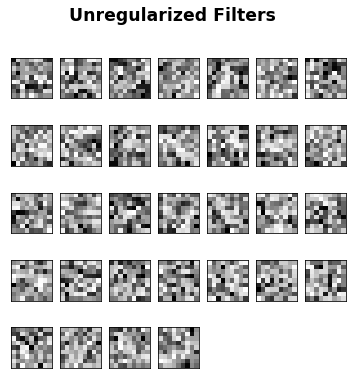

In [6]:
CNN.plotFilters(unregularized_weights, title="Unregularized")

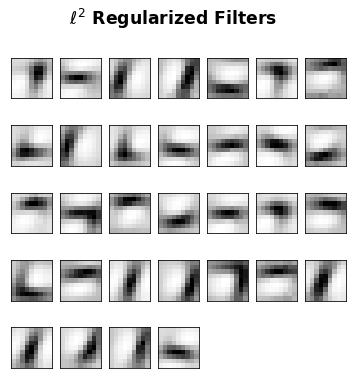

In [7]:
CNN.plotFilters(regularized_weights,title=r"$\ell^2$ Regularized")

In [8]:
gaussian_random_weights = np.random.standard_normal(size=regularized_weights.shape)

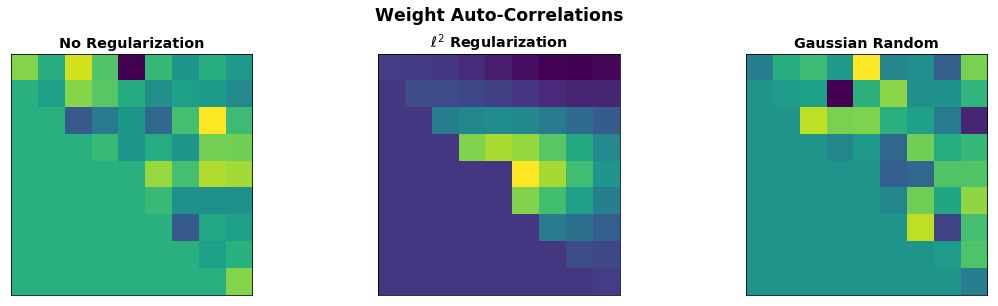

In [9]:
randomWeightIdx = np.random.choice(unregularized_weights.shape[-1])
no_reg_weight = unregularized_weights[:,:,0,randomWeightIdx]
reg_weight = regularized_weights[:,:,0,randomWeightIdx]
randomized_weight = gaussian_random_weights[:,:,0,randomWeightIdx]

weights_to_show = [no_reg_weight, reg_weight, randomized_weight]
names = ["No Regularization", r"$\ell^2$ Regularization", "Gaussian Random"]

CNN.plotAutoCorrs(weights_to_show,names)